Feature Detection:

Feature detection involves identifying key points or regions in an image that can be used for various tasks, such as image matching, tracking, or object recognition. Here are some common feature detection methods:

1. Canny Edge Detection

Purpose: Detects edges in an image by identifying areas of rapid intensity change.
Method: The Canny edge detection algorithm uses a multi-stage process:
Noise Reduction: Applies Gaussian blur to the image to reduce noise.
Gradient Calculation: Computes the intensity gradient of the image using Sobel operators.
Non-Maximum Suppression: Suppresses all but the strongest edges.
Double Thresholding: Identifies strong, weak, and non-edges.
Edge Tracking: Uses hysteresis to determine which weak edges are connected to strong edges.

2. SIFT (Scale-Invariant Feature Transform)

Purpose: Extracts features that are invariant to scale, rotation, and illumination changes.
Method: Identifies key points and computes descriptors for them, allowing for robust matching between images.
Key Points: SIFT is particularly useful for recognizing objects across different scales and orientations.

3. SURF (Speeded-Up Robust Features)

Purpose: Similar to SIFT but faster, SURF is designed for real-time applications.
Method: Utilizes Haar wavelets for feature extraction and is robust against scale and rotation.
Note: SURF is patented, and its use may be restricted in some applications.

4. ORB (Oriented FAST and Rotated BRIEF)

Purpose: A fast and efficient alternative to SIFT and SURF that is free to use.
Method: Combines the FAST keypoint detector and BRIEF descriptor to provide robust and rotation-invariant feature detection.

In [ ]:
import cv2
import matplotlib.pyplot as plt
from google.colab import files

# Step 1: Upload an image file
uploaded = files.upload()

Saving image.jpg to image.jpg


In [ ]:
# Load the image using OpenCV
image = cv2.imread('image.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

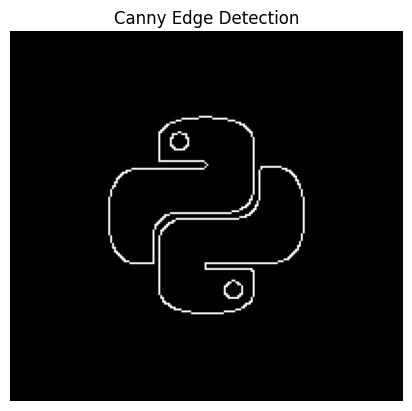

In [ ]:
#Canny Edge Detection
edges = cv2.Canny(gray_image, 100, 200)
plt.imshow(edges, cmap='gray')
plt.title("Canny Edge Detection")
plt.axis('off')
plt.show()

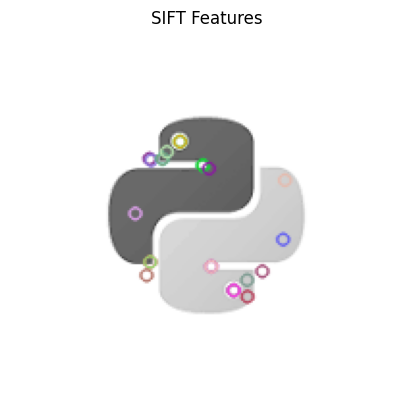

In [ ]:
sift = cv2.SIFT_create()
keypoints, descriptors = sift.detectAndCompute(gray_image, None)
image_sift = cv2.drawKeypoints(gray_image, keypoints, None)
plt.imshow(image_sift, cmap='gray')
plt.title("SIFT Features")
plt.axis('off')
plt.show()


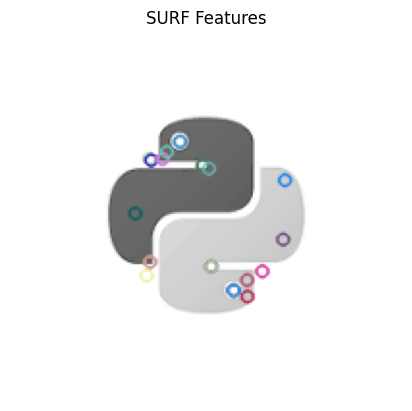

In [ ]:
sift = cv2.SIFT_create()
keypoints, descriptors = sift.detectAndCompute(gray_image, None)
image_surf = cv2.drawKeypoints(gray_image, keypoints, None)
plt.imshow(image_surf, cmap='gray')
plt.title("SURF Features")
plt.axis('off')
plt.show()


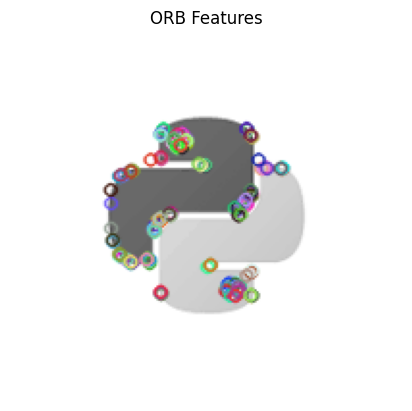

In [ ]:
orb = cv2.ORB_create()
keypoints, descriptors = orb.detectAndCompute(gray_image, None)
image_orb = cv2.drawKeypoints(gray_image, keypoints, None)
plt.imshow(image_orb, cmap='gray')
plt.title("ORB Features")
plt.axis('off')
plt.show()


Object detection: is a critical aspect of computer vision that involves identifying and locating objects within images or videos. One of the most well-known methods for object detection is the Haar Cascade classifier. This method is widely used, particularly for face detection, but it can also be adapted for other object types.

Haar Cascades
Haar Cascades is a machine learning object detection method that uses a cascade of classifiers trained with a set of positive and negative images. It works by leveraging Haar-like features, which are similar to the features used in image recognition.

How Haar Cascades Work
Training Phase: The classifier is trained on numerous images to learn the characteristics of the target object. This involves creating a dataset containing positive images (images with the object) and negative images (images without the object).
Haar-like Features: The method uses features similar to Haar features (rectangular features) that capture the presence of certain patterns in the image.
Cascade Classifier: The cascade structure allows the classifier to quickly discard negative windows, improving detection speed and efficiency. Only windows that pass the initial tests are subjected to more complex calculations.
Steps for Using Haar Cascades
Load the Cascade Classifier: Use a pre-trained model provided by OpenCV.
Read and Preprocess the Image: Convert the image to grayscale since the Haar Cascade algorithm works on single-channel images.
Detect Objects: Apply the detector to the image and retrieve the coordinates of detected objects.
Draw Bounding Boxes: Visualize detected objects by drawing rectangles around them.

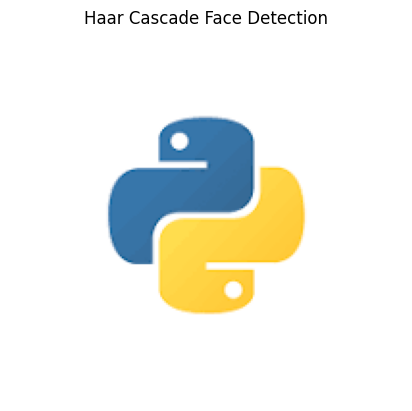

In [ ]:
# Step 2: Load the Haar cascade classifier for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Step 3: Detect faces in the image
faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5)

# Step 4: Draw rectangles around detected faces
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)

# Step 5: Display the result
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Haar Cascade Face Detection")
plt.axis('off')
plt.show()

HOG (Histogram of Oriented Gradients):

Description: HOG is a feature descriptor used for object detection, particularly for detecting pedestrians. It works by counting occurrences of gradient orientation in localized portions of an image.

How It Works:
The image is divided into small connected regions (cells).
For each cell, a histogram of gradient directions is calculated.
The histograms are then normalized and combined into a single feature vector.
Use Case: Primarily used for human detection.

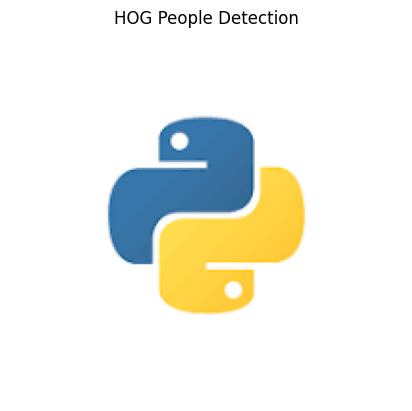

In [ ]:
# Initialize HOG descriptor
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

# Detect people
boxes, weights = hog.detectMultiScale(gray_image, winStride=(8, 8))

# Draw bounding boxes around detected people
for (x, y, w, h) in boxes:
    cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)

# Display the result
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("HOG People Detection")
plt.axis('off')
plt.show()

 YOLO (You Only Look Once):

Description: YOLO is a real-time object detection system that frames the task as a single regression problem, straight from image pixels to bounding box coordinates and class probabilities.

How It Works:
The image is divided into a grid.
Each grid cell predicts bounding boxes and their confidence scores.
Predictions are filtered based on confidence scores and class probabilities.
Use Case: Suitable for detecting multiple objects in images or videos quickly.
Libraries: Available in various frameworks, including TensorFlow and PyTorch.
Example: YOLOv3 and YOLOv4 are popular versions of this algorithm.


Faster R-CNN (Region-based Convolutional Neural Network)

Description: Faster R-CNN is a two-stage object detection framework that first generates region proposals and then classifies them.
How It Works:
A Region Proposal Network (RPN) suggests regions of interest.
These proposals are then refined and classified by a CNN.
Use Case: Offers high accuracy but is slower than YOLO and SSD.
Libraries: Implemented in frameworks like TensorFlow and PyTorch.

Mask R-CNN

Description: An extension of Faster R-CNN that adds a branch for predicting segmentation masks on each Region of Interest (RoI).
How It Works:
In addition to object detection, it predicts a binary mask for each detected object.
This allows for pixel-level segmentation along with bounding box detection.
Use Case: Ideal for tasks requiring object detection and segmentation simultaneously, such as in autonomous driving or medical imaging.
Libraries: Available in TensorFlow and PyTorch.